# Projekt Adsorptionskolonnenreaktor
Wir machen unsere erste simulation für folgendes problem:
Wir haben eine Adsorptionskolonnenreaktor welche Feuchte Luft trocknet
Hierzu wird feuchte Luft über ein "Bett" aus trockenem Absorber geleitet
Wir wollen nun simulieren wie das Wasser in den Absorber diffundiert.
Wir gehen hierzu in einfachen Teilschritten vor:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

concentration = np.zeros([100,100])
concentration[0,:] = np.ones(100)
temp_mat = np.zeros([100,100])

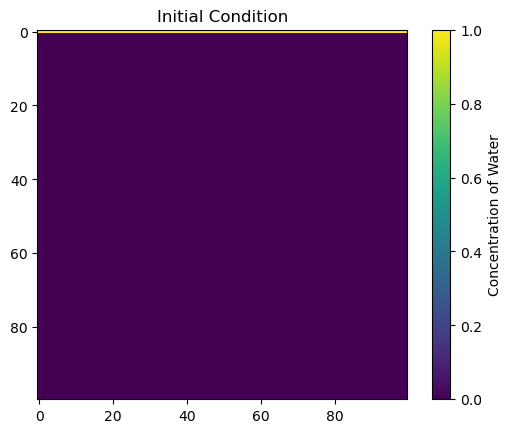

In [10]:
# plotten sie den initialien zustand
plt.imshow(concentration)
plt.title("Initial Condition")
plt.colorbar(label="Concentration of Water")
plt.show()

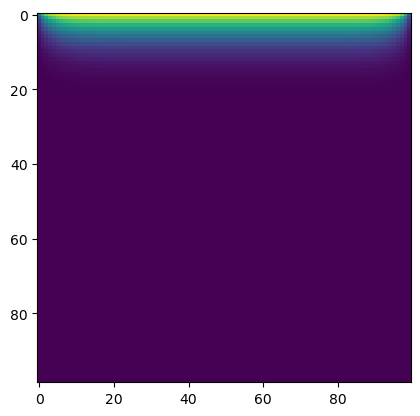

In [11]:
import numpy as np
import matplotlib.pyplot as plt

concentration = np.zeros([100,100])
concentration[0,:] = np.ones(100)
temp_mat = np.zeros([100,100])

for steps in range(50):
    for i in range(100):
        for j in range(100):
            temp = 0
            if i-1 >=0:
                temp += concentration[i-1, j]
            if i+1 < 100:
                temp += concentration[i+1, j]
            if j-1 >=0:
                temp += concentration[i, j-1]
            if j+1 < 100:
                temp += concentration[i, j+1]
            temp_mat[i,j] = 0.25 * temp
    concentration = temp_mat
    concentration[0,:] = np.ones(100)

plt.imshow(concentration[1:,:])

In [12]:
mat = np.zeros([10, 10])
for i in range(10):
    for j in range(10):
        if i == j:
            mat[i, j] = 1
print(mat)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Rauschen, matrix mit bestimmten Werten sind zu erwarten für Kurztest 2